In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')




In [23]:
import os
os.getcwd()

'C:\\Users\\laptop\\Desktop'

In [24]:
os.chdir('C:\\Users\\laptop\\Desktop')

In [25]:
df = pd.read_csv('diabetes.data',
                 sep='\s+',
                 header=0)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


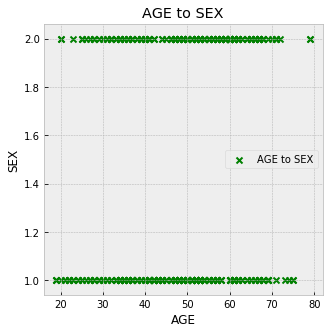

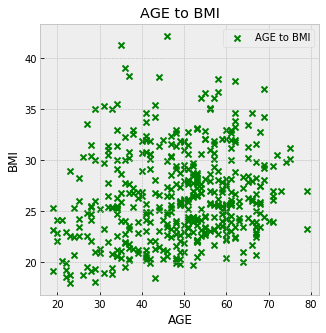

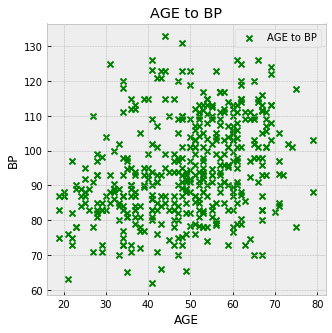

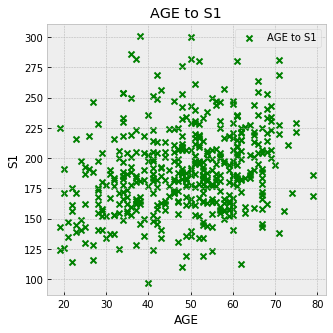

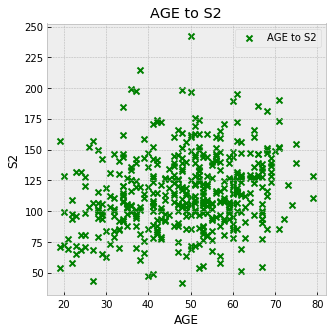

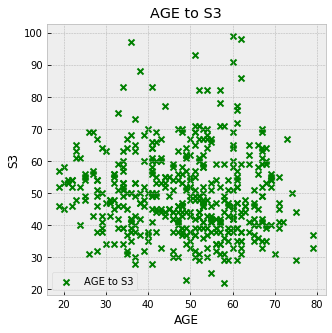

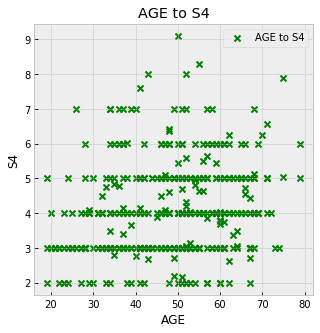

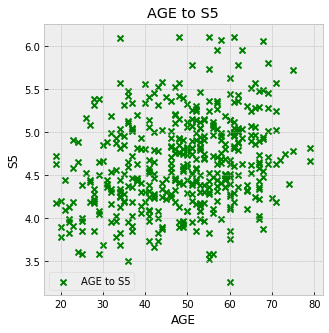

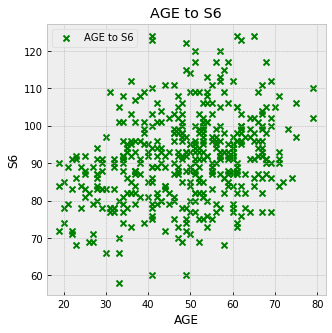

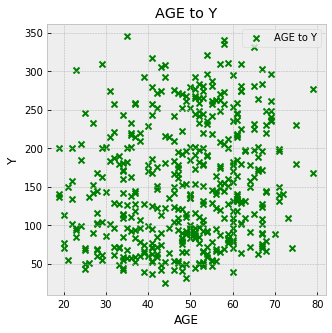

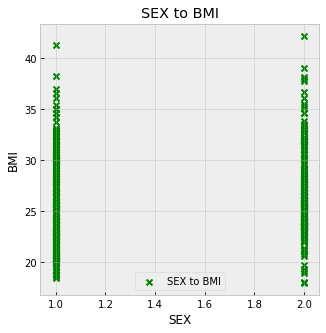

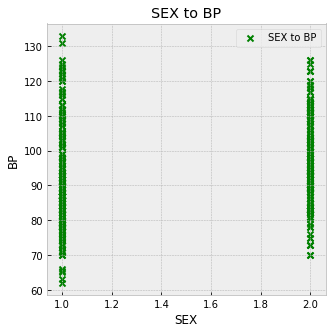

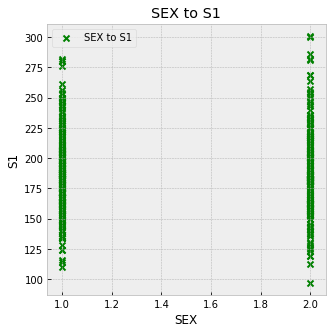

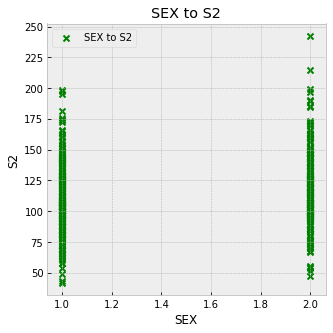

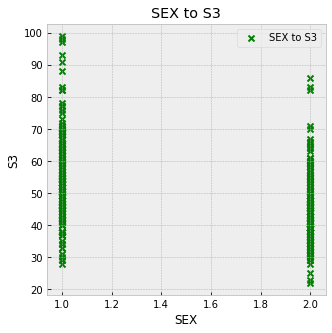

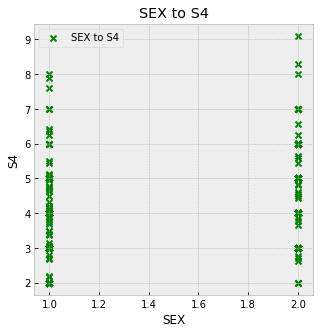

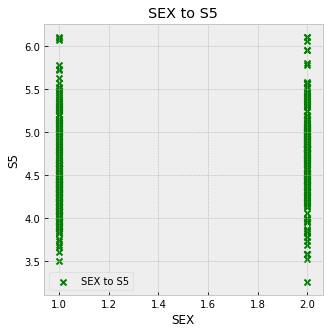

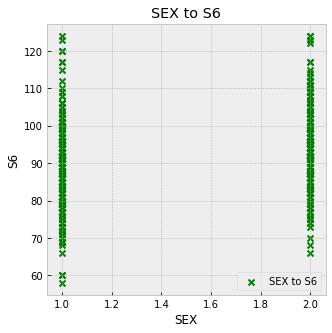

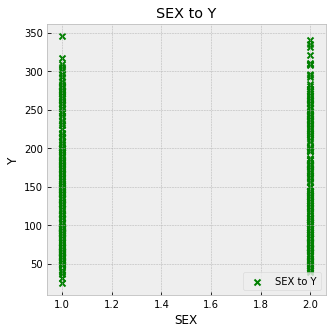

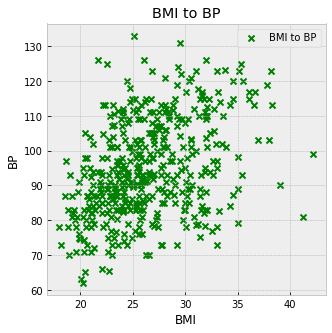

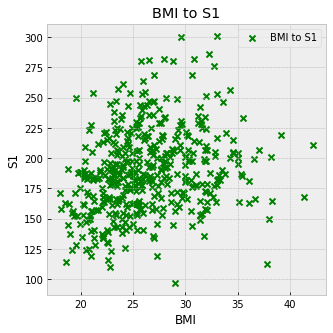

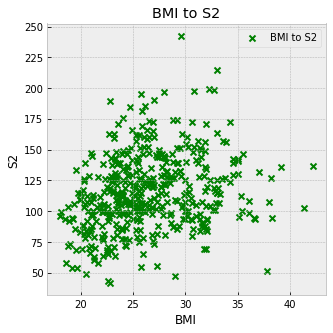

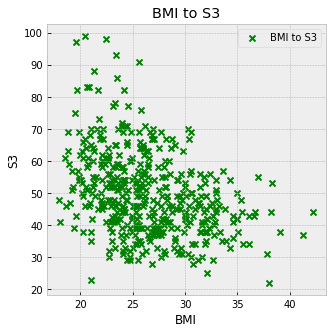

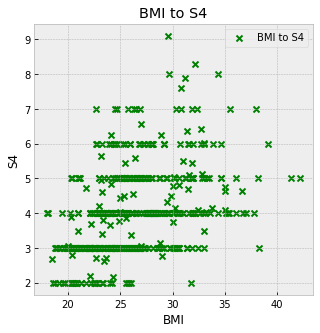

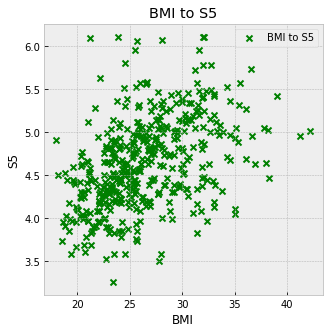

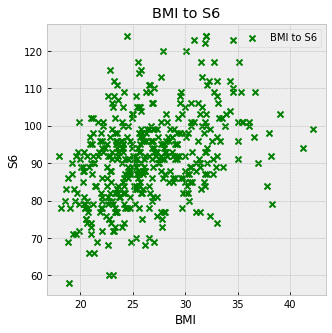

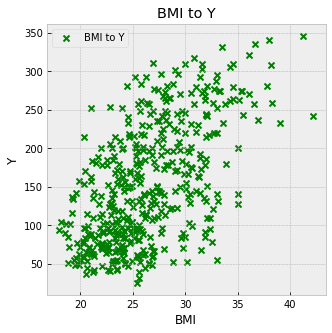

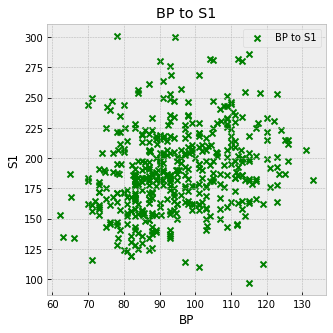

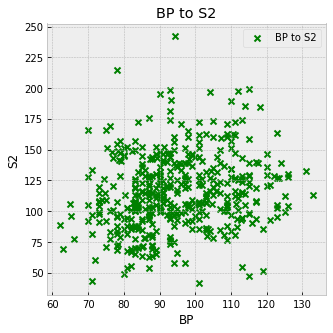

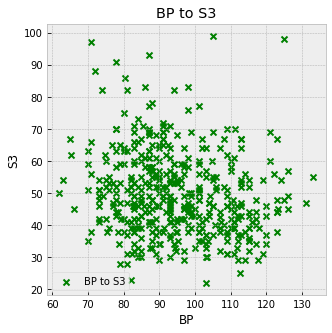

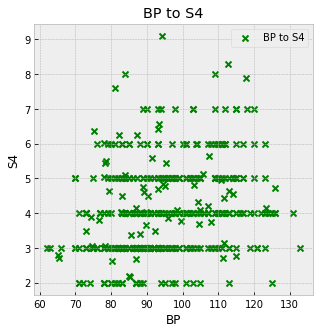

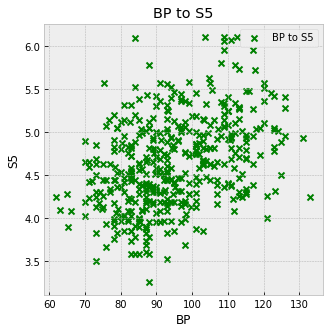

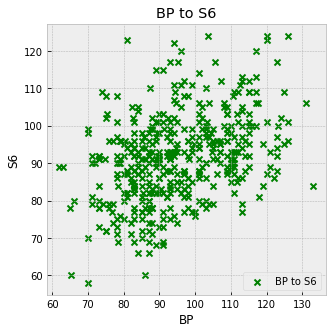

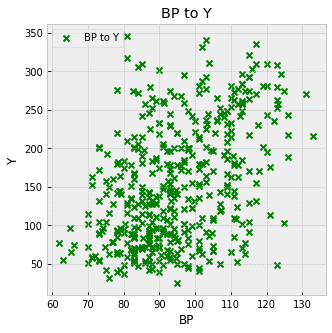

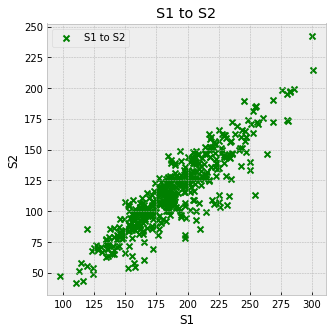

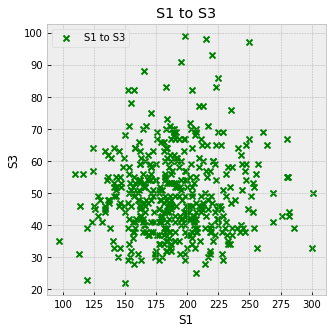

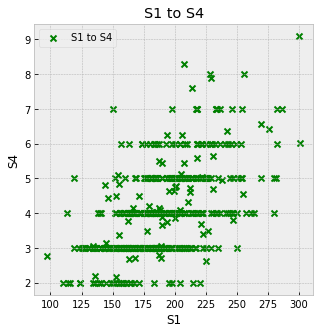

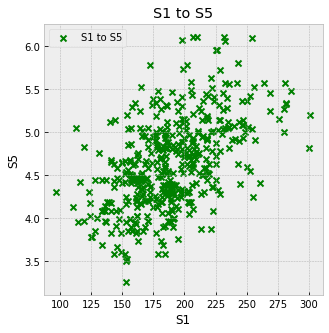

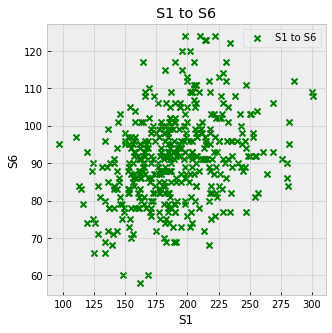

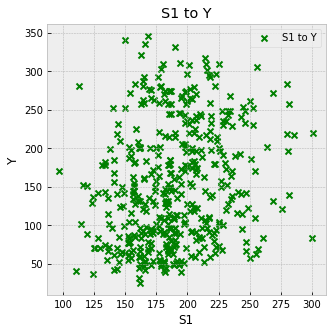

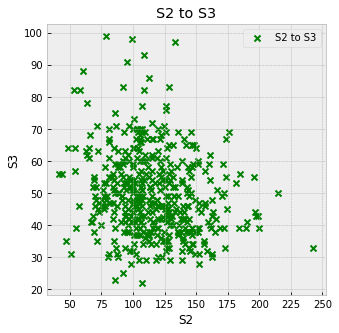

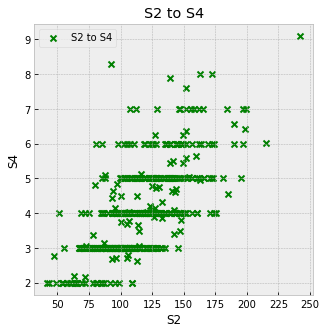

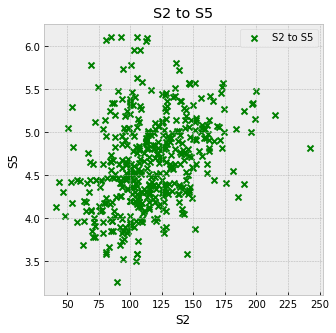

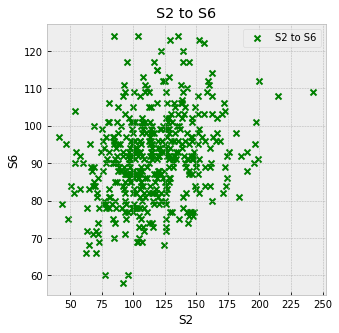

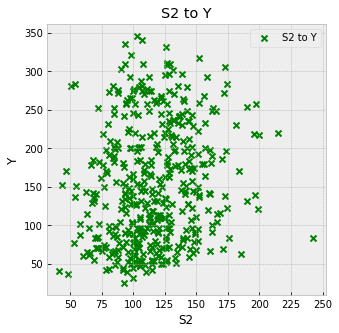

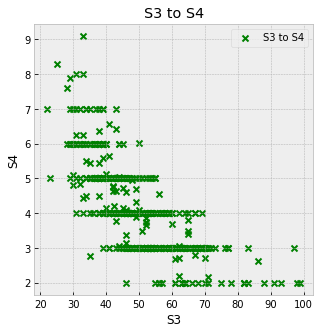

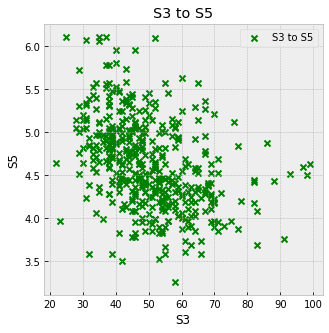

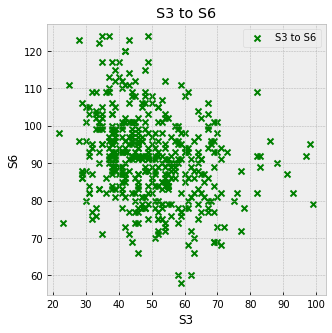

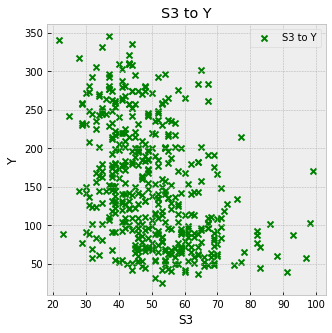

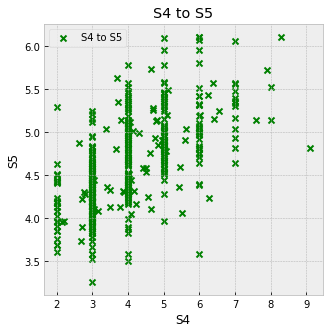

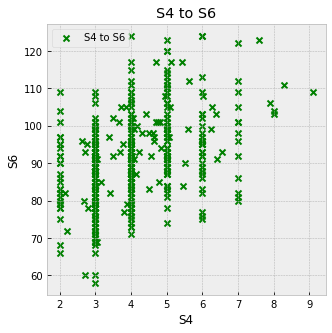

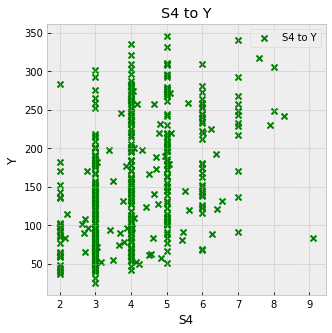

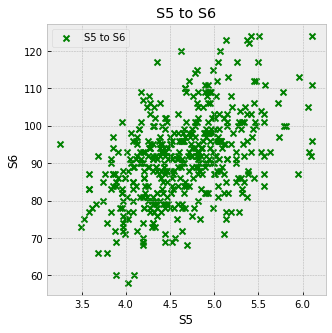

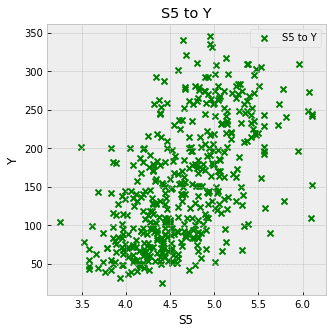

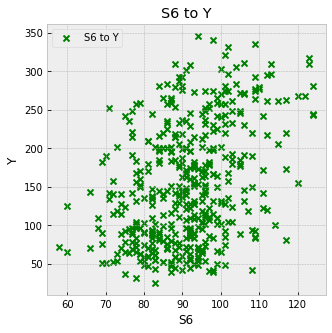

In [26]:
os.makedirs('plots/7-matplotlib_dataset_exploration', exist_ok=True)

for col1_idx, column1 in enumerate(df.columns):
    for col2_idx, column2 in enumerate(df.columns):
        if col1_idx < col2_idx:
            fig, axes = plt.subplots(1, 1, figsize=(5, 5))
            axes.scatter(df[column1], df[column2], label=f'{column1} to {column2}', color='green', marker='x')
            axes.set_title(f'{column1} to {column2}')
            axes.set_xlabel(column1)
            axes.set_ylabel(column2)
            axes.legend()
            plt.savefig(f'plots/7-matplotlib_dataset_exploration/diabetes_{column1}_{column2}_scatter.png', dpi=300)

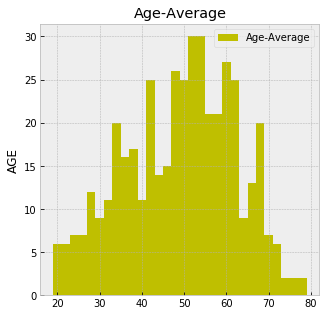

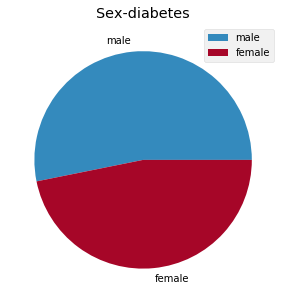

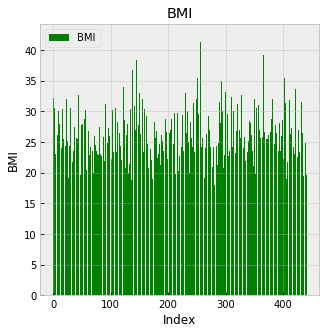

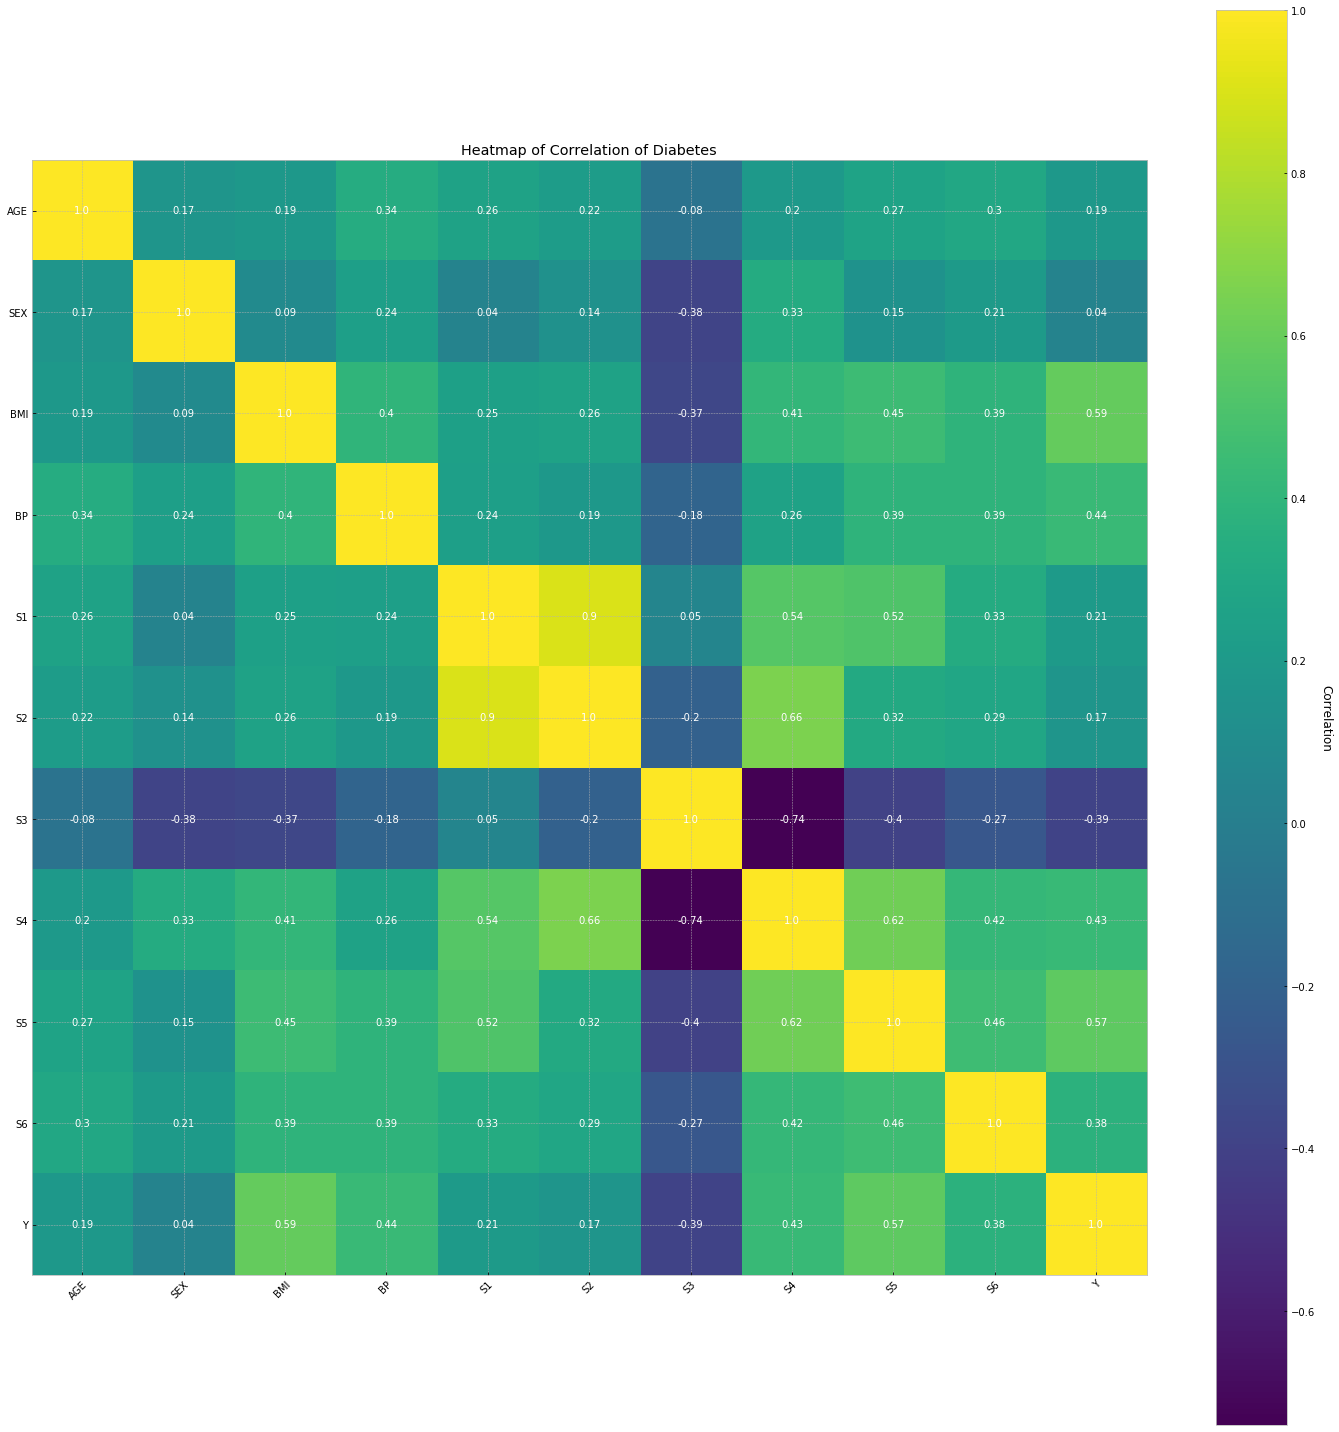

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.hist(df['AGE'], bins=30, color='y', label='Age-Average')
axes.set_title('Age-Average')
##axes.set_xlabel('Age')
axes.set_ylabel('AGE')
axes.legend()
plt.savefig('plots/diabetes_age-average_hist.png', dpi=300)

# Pie
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
labels = 'male','female'
axes.pie(df['SEX'].value_counts(), labels=labels)
axes.set_title('Sex-diabetes')
axes.legend()
plt.savefig('plots/diabetes_sex-diagnosis_pie.png', dpi=300)

# Bar
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.bar(np.arange(0, len(df['BMI'])), df['BMI'], color='g', label='BMI')
axes.set_title('BMI')
axes.set_xlabel('Index')
axes.set_ylabel('BMI')
axes.legend()
plt.savefig('plots/diabetes_BMI_bar.png', dpi=300)

# Correlation Heatmap
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
##df['encoded_diagnosis']=df['diagnosis'].map({'B': 0, 'M': 1})
correlation = df.corr().round(2)
im = axes.imshow(correlation)
cbar = axes.figure.colorbar(im, ax=axes)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
numrows = len(correlation.iloc[0])
numcolumns = len(correlation.columns)
axes.set_xticks(np.arange(numrows))
axes.set_yticks(np.arange(numcolumns))
axes.set_xticklabels(correlation.columns)
axes.set_yticklabels(correlation.columns)
plt.setp(axes.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(numrows):
    for j in range(numcolumns):
        text = axes.text(j, i, correlation.iloc[i, j], ha='center', va='center', color='w')
axes.set_title('Heatmap of Correlation of Diabetes')
fig.tight_layout()
plt.savefig('plots/diabetes_correlation_heatmap.png')

# 3D
male_df = df[df['SEX'] == 1]
female_df = df[df['SEX'] == 2]
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection='3d')
line1 = axes.scatter(male_df['AGE'], male_df['BMI'], male_df['BP'])
line2 = axes.scatter(female_df['AGE'], female_df['BMI'], female_df['BP'])
axes.legend((line1, line2), ('Male', 'Female'))
axes.set_xlabel('AGE')
axes.set_ylabel('BMI')
axes.set_zlabel('BP')
plt.savefig('plots/diabetes_diagnosis_scatter_3d.png')

plt.close()